In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data loading and preprocessing

In [2]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Cheking dataset for null values

In [3]:
df_insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There are no null values

Checking for duplicates

In [4]:
len(df_insurance) - len(df_insurance.drop_duplicates())

1

In [0]:
df_insurance = df_insurance.drop_duplicates()

Converting categorial features into numerical

In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [0]:
#sex: male =0, female =1
dct_sex={'male':0, 'female':1}
df_insurance['sex'] = df_insurance['sex'].map(dct_sex)

In [0]:
#smoker: no =0, yes =1
dct_smoker={'yes':1, 'no':0}
df_insurance['smoker'] = df_insurance['smoker'].map(dct_smoker)

In [9]:
df_insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [0]:
le = LabelEncoder()
le.fit(df_insurance['region'])
df_insurance['region_le'] = le.transform(df_insurance['region'])

In [11]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,region_le
0,19,1,27.900,0,1,southwest,16884.92400,3
1,18,0,33.770,1,0,southeast,1725.55230,2
2,28,0,33.000,3,0,southeast,4449.46200,2
3,33,0,22.705,0,0,northwest,21984.47061,1
4,32,0,28.880,0,0,northwest,3866.85520,1


# Exploratory data analysis

In [12]:
df_insurance.describe()

,age,sex,bmi,children,smoker,charges,region_le
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487,1.516081
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656,1.105208
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000,1.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300,2.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,3.000000


Correlation between features

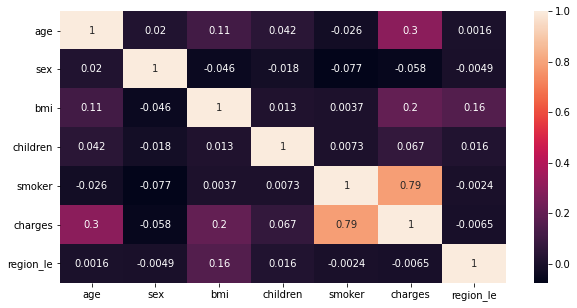

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_insurance.corr(),
                 cbar=True,
                 annot=True)


After checking correlation it is seen that smokig is highly connected to charges

Let's investigate 'charges'

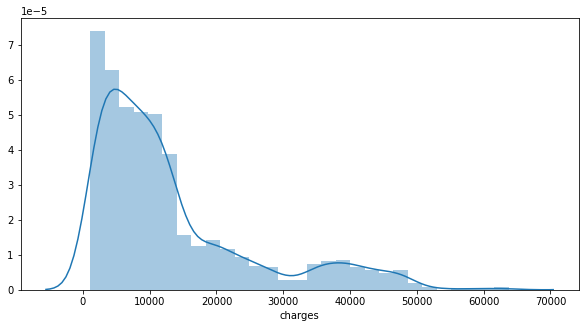

In [14]:
plt.figure(figsize=(10, 5))
sns.distplot(df_insurance.charges)

# Building model

Separating our target variable from features

In [0]:
y = df_insurance['charges']
#we don't need categorial variable 'region', we have 'region_le' instead
X = df_insurance.drop(['region','charges'], axis=1)

Splitting our data into test and training datasets

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 465)

Models for regression

In [0]:
regressors = [LinearRegression(), 
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), 
	          KNeighborsRegressor(n_neighbors=10, weights='distance', metric='manhattan'),
	          MLPRegressor(random_state=1, max_iter=500, solver = 'lbfgs')
	          ]

Training our models and estimating R^2 coefficient

In [0]:
results = pd.DataFrame()
tmp = {}
for regr in regressors:
  r = str(regr)
  tmp['Regressor'] = r[:r.index('(')]
  regr.fit(Xtrain, ytrain)
  tmp['MAE'] = mean_absolute_error(ytest, regr.predict(Xtest))
  tmp['R2'] = r2_score(ytest, regr.predict(Xtest))
  results = results.append([tmp])


results.set_index('Regressor', inplace=True)

Plotting the results

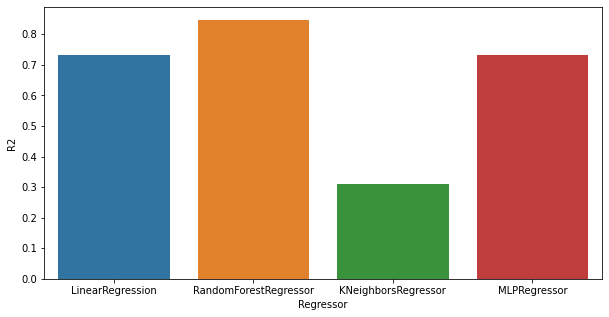

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x = results.index, y = results.R2)

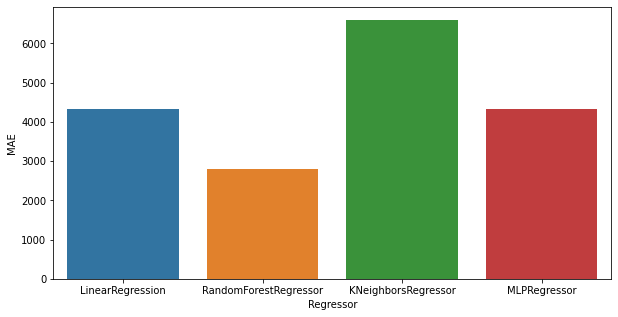

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x = results.index, y = results.MAE)

# Best model & feature mportance

According to the results the best model is Random Forest which explains 84,6 % of the variation by the input variables

Feature importance according to the best model

In [22]:
regr = regressors[1]
regr.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
importance = pd.DataFrame({'vars': X.columns, 'importance' : regr.feature_importances_})
importance

,vars,importance
0,age,0.152825
1,sex,0.009554
2,bmi,0.180547
3,children,0.030011
4,smoker,0.604065
5,region_le,0.022998


# Results

several regression models were compared: linear regression, Random Forest, k Neighbours & multi-layer perceptron

the coefficient of determination was used for evaluating predictions

accourding to the results the best model is Random Forest

the most importanat variable - 'smoker'
